In [5]:
#imports
from helper import data_loader, math_helper, k_center, k_medians, plot_helper
from fairlets.fairlets import fairlet_decomposition
import numpy as np
import pandas as pd
import networkx as nx
import time
import matplotlib.pyplot as plt

In [6]:
loader = data_loader.data_loader('./config/dataset_config.json')
mathHelper = math_helper.math_helper(loader)
config = loader.get_config()
#dataset_name = "adult"

In [7]:
dataset_name = "bank"
clustering_method = "k-medians"

X,_ = loader.load_dataset(dataset_name)
#only return the columns of the protected attribute and the ones necessary for computing the distance
prepared_dataset = loader.prepare_dataset(X, dataset_name)
reds, blues = loader.red_blue_split(prepared_dataset, dataset_name)
#take a sample with size according to the paper
sample_balance = 0
randomState = 42
while(sample_balance < 0.5):
    sampled_dataset = loader.sample_data(prepared_dataset, dataset_name, randomState)
    sample_balance = mathHelper.get_balance(sampled_dataset, config[dataset_name]['sensitive_column'], dataset_name)
    randomState += 1

sampled_reds, sampled_blues = loader.red_blue_split(sampled_dataset, dataset_name)

In [8]:
fairletDecomposition = fairlet_decomposition(sampled_dataset, sampled_blues, sampled_reds, dataset_name, loader)

In [9]:
distances = fairletDecomposition.get_distances()

In [10]:
fairletDecomposition.create_MCF(distances, clustering_method, 2, 400)

In [ ]:
flowCost, flowDictionary = nx.network_simplex(fairletDecomposition.G)

In [ ]:

fairletDecomposition.get_cluster_information(clustering_method=clustering_method, t=2, T=400)
k_medians_instance = k_medians.k_medians(dataset_name, loader)
cluster_counts, unfair_costs, unfair_balances, unfair_durations, fair_costs, fair_balances, fair_durations = fairletDecomposition.CalculateClusterCostAndBalance(None, k_medians_instance, clustering_method, 3, 20)

plotHelper = plot_helper.plotHelper()
base_title = dataset_name + " " + clustering_method
plotHelper.plot_costs_and_balance(cluster_counts, unfair_balances, unfair_costs, 2, base_title + " unfair")
plotHelper.plot_costs_and_balance(cluster_counts, fair_balances, fair_costs, 2, base_title + " fair")
plotHelper.plot_durations(cluster_counts, unfair_durations, fair_durations)

Dataset name: adult; randomState used: 42
Amount of Male values:  32650
Amount of Female values:  16192
Amount of 0 values:  392
Amount of 1 values:  208
balance of the chosen sample: 0.5306122448979592


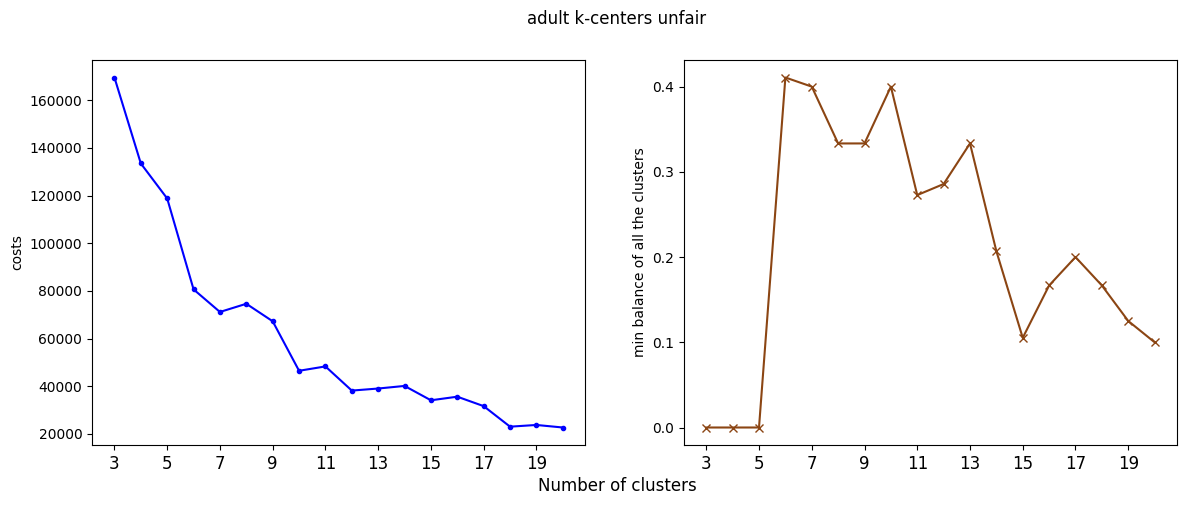

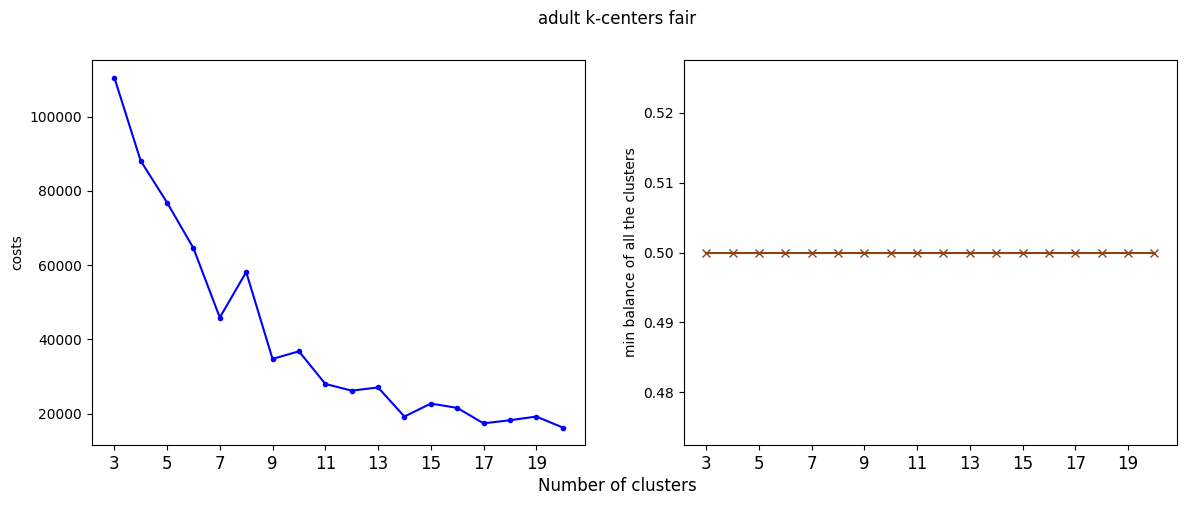

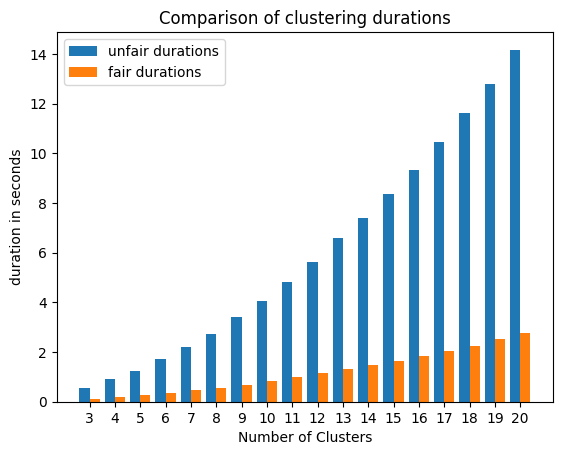

Dataset name: bank; randomState used: 43
Amount of single values:  12790
Amount of married values:  27214
Amount of 0 values:  339
Amount of 1 values:  661
balance of the chosen sample: 0.5128593040847201


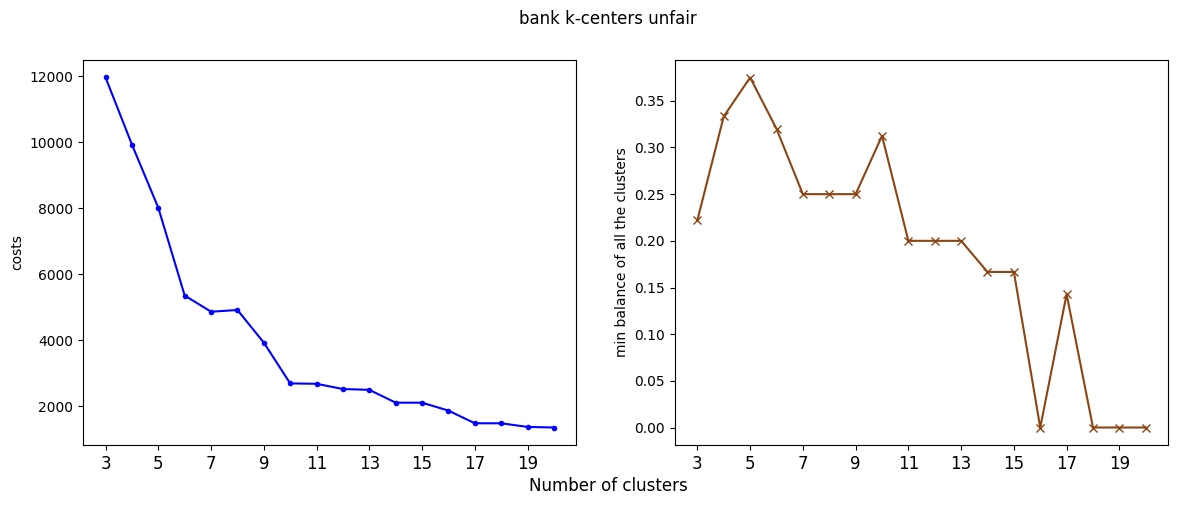

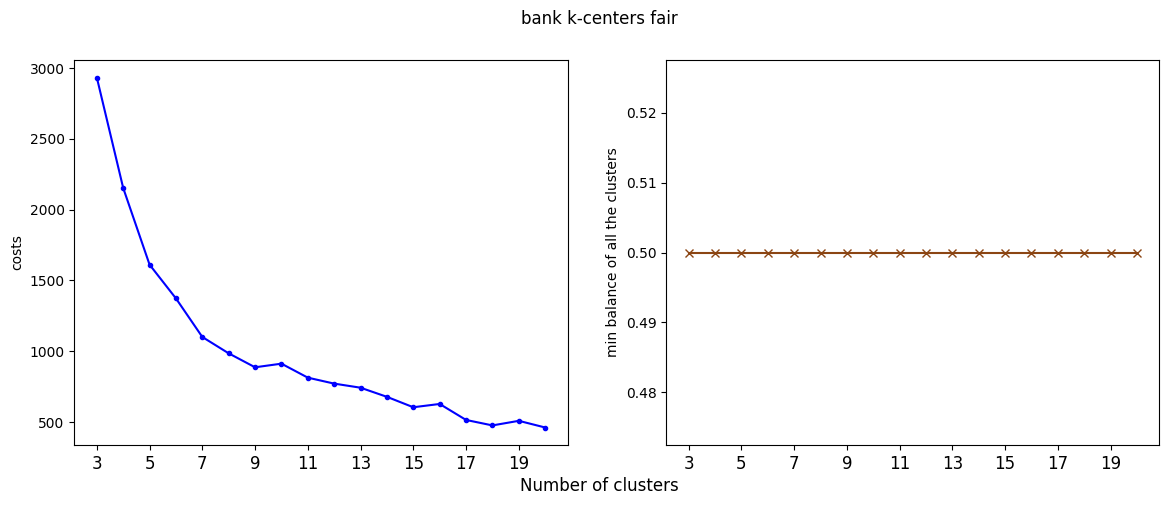

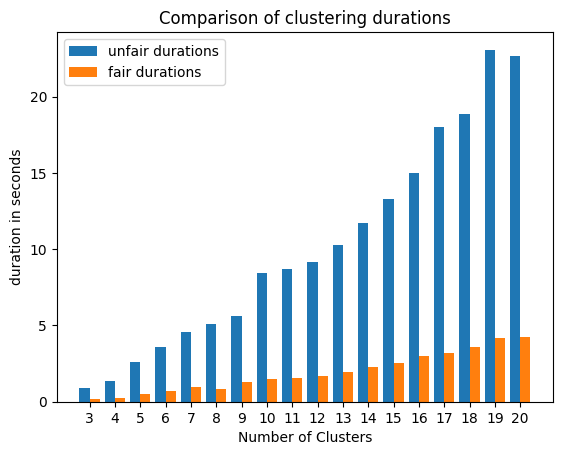

Dataset name: adult; randomState used: 42
Amount of Male values:  32650
Amount of Female values:  16192
Amount of 0 values:  392
Amount of 1 values:  208
balance of the chosen sample: 0.5306122448979592


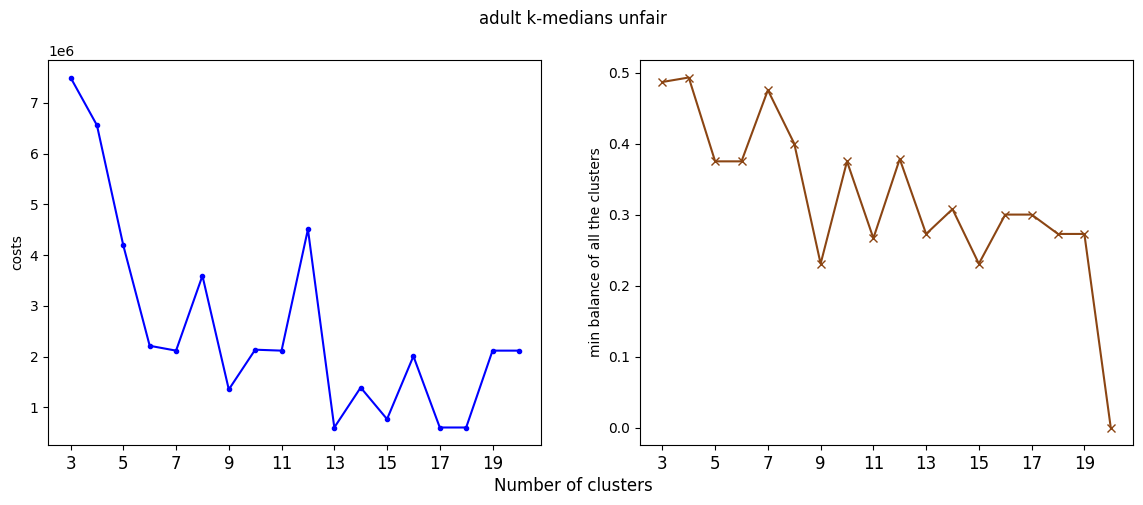

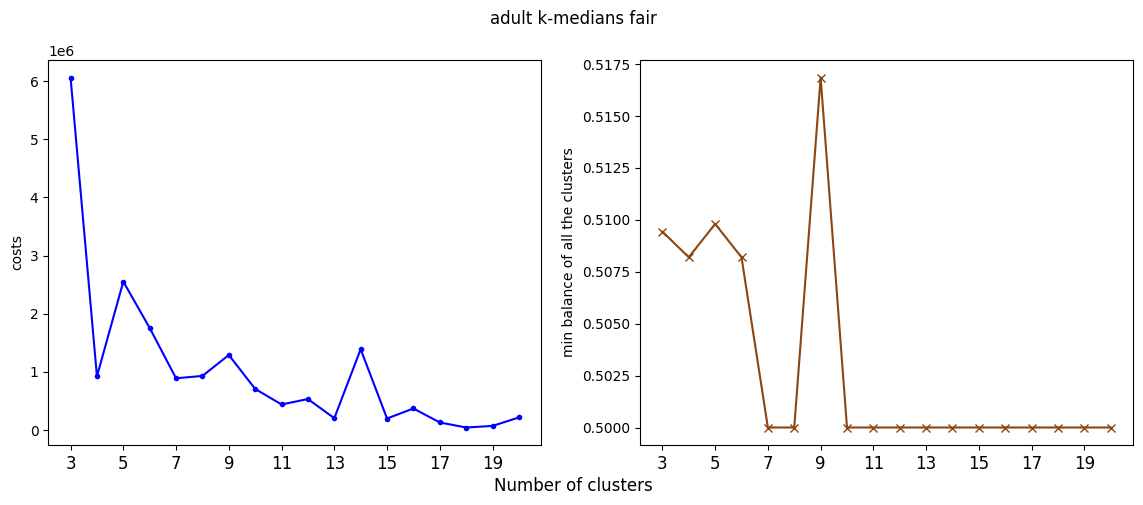

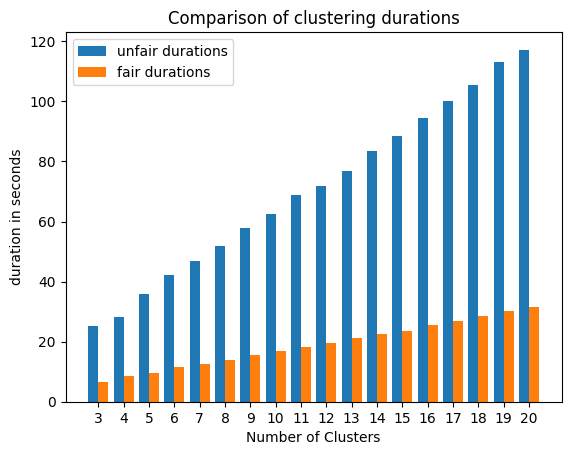

Dataset name: bank; randomState used: 43
Amount of single values:  12790
Amount of married values:  27214
Amount of 0 values:  339
Amount of 1 values:  661
balance of the chosen sample: 0.5128593040847201


KeyboardInterrupt: 

In [3]:
dataset_names = ["adult", "bank"]
clustering_methods = ["k-centers", "k-medians"]
#clustering_method = clustering_methods[0]

for clustering_method in clustering_methods:
    for dataset_name in dataset_names:
        #load and sample data accorind to the paper
        X,_ = loader.load_dataset(dataset_name)
        #only return the columns of the protected attribute and the ones necessary for computing the distance
        prepared_dataset = loader.prepare_dataset(X, dataset_name)
        reds, blues = loader.red_blue_split(prepared_dataset, dataset_name)
        #take a sample with size according to the paper
        sample_balance = 0
        randomState = 42
        while(sample_balance < 0.5):
            sampled_dataset = loader.sample_data(prepared_dataset, dataset_name, randomState)
            sample_balance = mathHelper.get_balance(sampled_dataset, config[dataset_name]['sensitive_column'], dataset_name)
            randomState += 1

        sampled_reds, sampled_blues = loader.red_blue_split(sampled_dataset, dataset_name)

        print("Dataset name: %s; randomState used: %d" %(dataset_name,randomState-1))
        #some information about the dataset
        for sensitive_value in config[dataset_name]['sensitive_values']:
            print("Amount of %s values:  %d" %(sensitive_value, X.value_counts(config[dataset_name]['sensitive_column'])[sensitive_value]))

        #some information about the sample
        for sensitive_value in [0,1]:
            print("Amount of %s values:  %d" %(sensitive_value, sampled_dataset.value_counts(config[dataset_name]['sensitive_column'])[sensitive_value]))

        #output some information about the chosen sample
        sample_balance = mathHelper.get_balance(sampled_dataset, config[dataset_name]['sensitive_column'], dataset_name)
        print("balance of the chosen sample: " + str(sample_balance))

        fairletDecomposition = fairlet_decomposition(sampled_dataset, sampled_blues, sampled_reds, dataset_name, loader)
        fairletDecomposition.get_cluster_information(clustering_method=clustering_method, t=2, T=400)
        if(clustering_method == "k-centers"):

            k_centers_instance = k_center.k_center(dataset_name, loader)
            cluster_counts, unfair_costs, unfair_balances, unfair_durations, fair_costs, fair_balances, fair_durations = fairletDecomposition.CalculateClusterCostAndBalance(k_centers_instance, None, clustering_method, 3, 20)

            plotHelper = plot_helper.plotHelper()
            base_title = dataset_name + " " + clustering_method
            plotHelper.plot_costs_and_balance(cluster_counts, unfair_balances, unfair_costs, 2, base_title + " unfair")
            plotHelper.plot_costs_and_balance(cluster_counts, fair_balances, fair_costs, 2, base_title + " fair")
            plotHelper.plot_durations(cluster_counts, unfair_durations, fair_durations)

        elif(clustering_method == "k-medians"):
            k_medians_instance = k_medians.k_medians(dataset_name, loader)
            cluster_counts, unfair_costs, unfair_balances, unfair_durations, fair_costs, fair_balances, fair_durations = fairletDecomposition.CalculateClusterCostAndBalance(None, k_medians_instance, clustering_method, 3, 20)

            plotHelper = plot_helper.plotHelper()
            base_title = dataset_name + " " + clustering_method
            plotHelper.plot_costs_and_balance(cluster_counts, unfair_balances, unfair_costs, 2, base_title + " unfair")
            plotHelper.plot_costs_and_balance(cluster_counts, fair_balances, fair_costs, 2, base_title + " fair")
            plotHelper.plot_durations(cluster_counts, unfair_durations, fair_durations)
        